<a href="https://colab.research.google.com/github/syasy00/HeartDiseasePredictions/blob/main/HeartDiseasePrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [269]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, roc_curve, auc
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from scipy.stats import norm
from sklearn.impute import KNNImputer
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, LabelEncoder, MinMaxScaler
from sklearn.feature_selection import chi2
from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression



In [176]:
# Function for setting style and size of plot
def set_size_style(width, height, style=None):
    plt.figure(figsize=(width, height))
    if style != None:
        sns.set_style(style)

# Function for customizating the plot
def customize_plot(plot, title:str, xlabel:str,  ylabel:str, title_font:int, label_font:int):
    plot.set_title(title, fontsize = title_font, weight='bold')
    plot.set_xlabel(xlabel, fontsize = label_font, weight='bold')
    plot.set_ylabel(ylabel, fontsize = label_font, weight='bold')

In [177]:
df = pd.read_csv("heart_2022_with_nans.csv")

In [178]:
df.head()

,State,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,LastCheckupTime,PhysicalActivities,SleepHours,RemovedTeeth,HadHeartAttack,...,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,HIVTesting,FluVaxLast12,PneumoVaxEver,TetanusLast10Tdap,HighRiskLastYear,CovidPos
0,Alabama,Female,Very good,0.0,0.0,Within past year (anytime less than 12 months ...,No,8.0,NaN,No,...,NaN,NaN,NaN,No,No,Yes,No,"Yes, received tetanus shot but not sure what type",No,No
1,Alabama,Female,Excellent,0.0,0.0,NaN,No,6.0,NaN,No,...,1.60,68.04,26.57,No,No,No,No,"No, did not receive any tetanus shot in the pa...",No,No
2,Alabama,Female,Very good,2.0,3.0,Within past year (anytime less than 12 months ...,Yes,5.0,NaN,No,...,1.57,63.50,25.61,No,No,No,No,NaN,No,Yes
3,Alabama,Female,Excellent,0.0,0.0,Within past year (anytime less than 12 months ...,Yes,7.0,NaN,No,...,1.65,63.50,23.30,No,No,Yes,Yes,"No, did not receive any tetanus shot in the pa...",No,No
4,Alabama,Female,Fair,2.0,0.0,Within past year (anytime less than 12 months ...,Yes,9.0,NaN,No,...,1.57,53.98,21.77,Yes,No,No,Yes,"No, did not receive any tetanus shot in the pa...",No,No


In [179]:
df.shape

(445132, 40)

In [180]:
df.columns

Index(['State', 'Sex', 'GeneralHealth', 'PhysicalHealthDays',
       'MentalHealthDays', 'LastCheckupTime', 'PhysicalActivities',
       'SleepHours', 'RemovedTeeth', 'HadHeartAttack', 'HadAngina',
       'HadStroke', 'HadAsthma', 'HadSkinCancer', 'HadCOPD',
       'HadDepressiveDisorder', 'HadKidneyDisease', 'HadArthritis',
       'HadDiabetes', 'DeafOrHardOfHearing', 'BlindOrVisionDifficulty',
       'DifficultyConcentrating', 'DifficultyWalking',
       'DifficultyDressingBathing', 'DifficultyErrands', 'SmokerStatus',
       'ECigaretteUsage', 'ChestScan', 'RaceEthnicityCategory', 'AgeCategory',
       'HeightInMeters', 'WeightInKilograms', 'BMI', 'AlcoholDrinkers',
       'HIVTesting', 'FluVaxLast12', 'PneumoVaxEver', 'TetanusLast10Tdap',
       'HighRiskLastYear', 'CovidPos'],
      dtype='object')

In [181]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 445132 entries, 0 to 445131
Data columns (total 40 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   State                      445132 non-null  object 
 1   Sex                        445132 non-null  object 
 2   GeneralHealth              443934 non-null  object 
 3   PhysicalHealthDays         434205 non-null  float64
 4   MentalHealthDays           436065 non-null  float64
 5   LastCheckupTime            436824 non-null  object 
 6   PhysicalActivities         444039 non-null  object 
 7   SleepHours                 439679 non-null  float64
 8   RemovedTeeth               433772 non-null  object 
 9   HadHeartAttack             442067 non-null  object 
 10  HadAngina                  440727 non-null  object 
 11  HadStroke                  443575 non-null  object 
 12  HadAsthma                  443359 non-null  object 
 13  HadSkinCancer              44

**EDA and Pre-Processing**

In [182]:
# describtion for numerical columns
df.describe()

,PhysicalHealthDays,MentalHealthDays,SleepHours,HeightInMeters,WeightInKilograms,BMI
count,434205.000000,436065.000000,439679.000000,416480.000000,403054.000000,396326.000000
mean,4.347919,4.382649,7.022983,1.702691,83.074470,28.529842
std,8.688912,8.387475,1.502425,0.107177,21.448173,6.554889
min,0.000000,0.000000,1.000000,0.910000,22.680000,12.020000
25%,0.000000,0.000000,6.000000,1.630000,68.040000,24.130000
50%,0.000000,0.000000,7.000000,1.700000,80.740000,27.440000
75%,3.000000,5.000000,8.000000,1.780000,95.250000,31.750000
max,30.000000,30.000000,24.000000,2.410000,292.570000,99.640000


**Drop duplication**

In [183]:
df.duplicated().sum()

157

In [184]:
df.drop_duplicates(keep='first', inplace=True)
df.shape

(444975, 40)

**Handle Missing Values**

In [185]:
df.isnull().sum()

State                            0
Sex                              0
GeneralHealth                 1193
PhysicalHealthDays           10922
MentalHealthDays              9062
LastCheckupTime               8301
PhysicalActivities            1088
SleepHours                    5448
RemovedTeeth                 11355
HadHeartAttack                3060
HadAngina                     4400
HadStroke                     1552
HadAsthma                     1768
HadSkinCancer                 3138
HadCOPD                       2214
HadDepressiveDisorder         2807
HadKidneyDisease              1921
HadArthritis                  2628
HadDiabetes                   1082
DeafOrHardOfHearing          20502
BlindOrVisionDifficulty      21419
DifficultyConcentrating      24095
DifficultyWalking            23867
DifficultyDressingBathing    23770
DifficultyErrands            25511
SmokerStatus                 35316
ECigaretteUsage              35514
ChestScan                    55900
RaceEthnicityCategor

<Axes: >

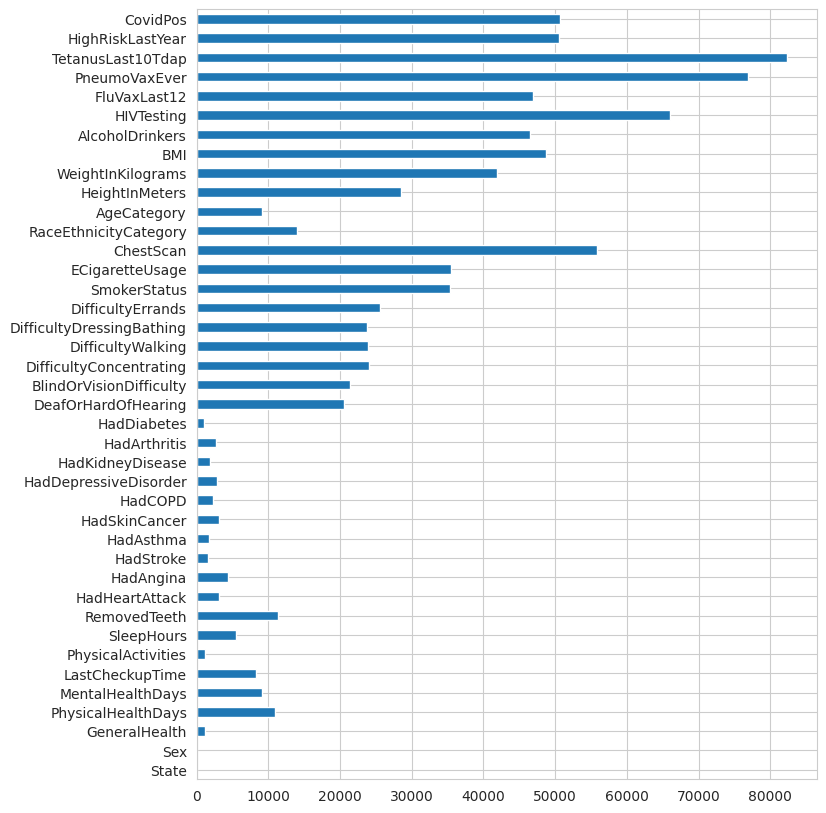

In [186]:
set_size_style(8,10,'whitegrid')
df.isna().sum().plot(kind='barh')

In [187]:
 #Calculating percentage of null values in each column
null_values = round(df.isna().sum()/df.shape[0] * 100,2)

In [188]:
null_values

State                         0.00
Sex                           0.00
GeneralHealth                 0.27
PhysicalHealthDays            2.45
MentalHealthDays              2.04
LastCheckupTime               1.87
PhysicalActivities            0.24
SleepHours                    1.22
RemovedTeeth                  2.55
HadHeartAttack                0.69
HadAngina                     0.99
HadStroke                     0.35
HadAsthma                     0.40
HadSkinCancer                 0.71
HadCOPD                       0.50
HadDepressiveDisorder         0.63
HadKidneyDisease              0.43
HadArthritis                  0.59
HadDiabetes                   0.24
DeafOrHardOfHearing           4.61
BlindOrVisionDifficulty       4.81
DifficultyConcentrating       5.41
DifficultyWalking             5.36
DifficultyDressingBathing     5.34
DifficultyErrands             5.73
SmokerStatus                  7.94
ECigaretteUsage               7.98
ChestScan                    12.56
RaceEthnicityCategor

**Column having less than 1% null values will be dropping**

In [189]:
cols = [i for i in df.columns if df[i].isnull().mean() < 0.01]
cols


['State',
 'Sex',
 'GeneralHealth',
 'PhysicalActivities',
 'HadHeartAttack',
 'HadAngina',
 'HadStroke',
 'HadAsthma',
 'HadSkinCancer',
 'HadCOPD',
 'HadDepressiveDisorder',
 'HadKidneyDisease',
 'HadArthritis',
 'HadDiabetes']

In [190]:
df = df.dropna(subset=cols)
df.shape

(424586, 40)

**Dropping unecessary columns**

In [191]:
columns = ['State','DeafOrHardOfHearing','LastCheckupTime', 'RemovedTeeth', 'BlindOrVisionDifficulty', 'DifficultyConcentrating', 'DifficultyWalking',
           'DifficultyDressingBathing', 'DifficultyErrands', 'ECigaretteUsage', 'ChestScan', 'HIVTesting', 'FluVaxLast12', 'TetanusLast10Tdap']

df.drop(columns, axis=1, inplace=True)
df.head()

,Sex,GeneralHealth,PhysicalHealthDays,MentalHealthDays,PhysicalActivities,SleepHours,HadHeartAttack,HadAngina,HadStroke,HadAsthma,...,SmokerStatus,RaceEthnicityCategory,AgeCategory,HeightInMeters,WeightInKilograms,BMI,AlcoholDrinkers,PneumoVaxEver,HighRiskLastYear,CovidPos
0,Female,Very good,0.0,0.0,No,8.0,No,No,No,No,...,Never smoked,"White only, Non-Hispanic",Age 80 or older,NaN,NaN,NaN,No,No,No,No
1,Female,Excellent,0.0,0.0,No,6.0,No,No,No,No,...,Never smoked,"White only, Non-Hispanic",Age 80 or older,1.60,68.04,26.57,No,No,No,No
2,Female,Very good,2.0,3.0,Yes,5.0,No,No,No,No,...,Never smoked,"White only, Non-Hispanic",Age 55 to 59,1.57,63.50,25.61,No,No,No,Yes
3,Female,Excellent,0.0,0.0,Yes,7.0,No,No,No,Yes,...,Current smoker - now smokes some days,"White only, Non-Hispanic",NaN,1.65,63.50,23.30,No,Yes,No,No
4,Female,Fair,2.0,0.0,Yes,9.0,No,No,No,No,...,Never smoked,"White only, Non-Hispanic",Age 40 to 44,1.57,53.98,21.77,Yes,Yes,No,No


In [192]:
df1 = df.copy()

**Function for random imputation in a column**

In [193]:
def random_impute(series):
    # Filter out the non-missing values
    non_missing = series.dropna()
    # Replace missing values with a random selection of non-missing values
    imputed = series.apply(lambda x: np.random.choice(non_missing) if pd.isnull(x) else x)
    return imputed


**Checking for distribution**

<Axes: xlabel='PneumoVaxEver'>

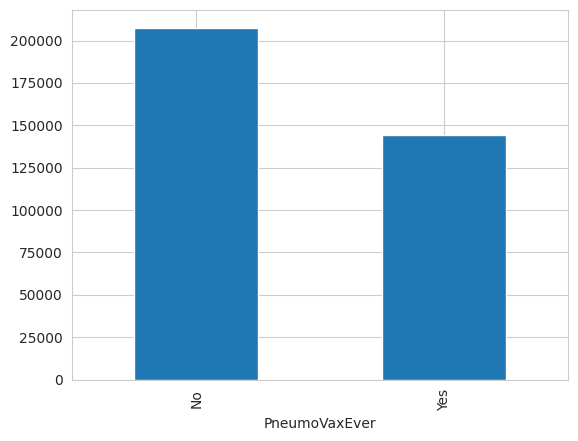

In [194]:
df1['PneumoVaxEver'].value_counts().plot(kind='bar')

In [195]:
df1['PneumoVaxEver'] = random_impute(df1['PneumoVaxEver'])
df1['PneumoVaxEver'].isnull().sum()

0

<Axes: xlabel='AlcoholDrinkers'>

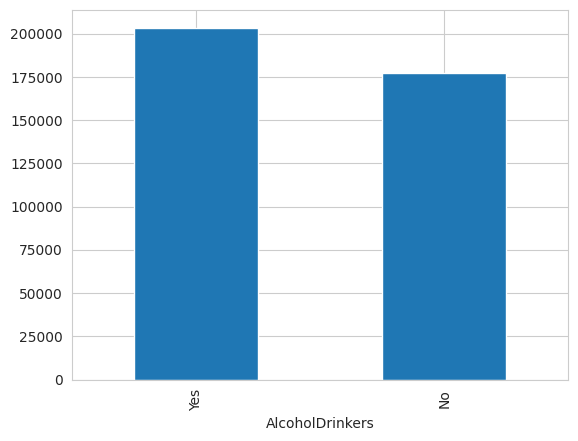

In [196]:
df1['AlcoholDrinkers'].value_counts().plot(kind='bar')

In [197]:
df1['AlcoholDrinkers'] = random_impute(df1['AlcoholDrinkers'])
df1['AlcoholDrinkers'].isnull().sum()

0

<Axes: xlabel='AgeCategory'>

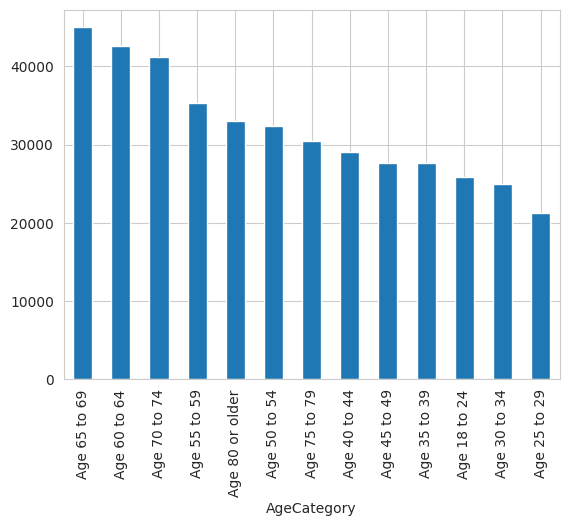

In [198]:
df1['AgeCategory'].value_counts().plot(kind='bar')

In [199]:
df1['AgeCategory'] = random_impute(df1['AgeCategory'])
df1['AgeCategory'].isnull().sum()

0

<Axes: xlabel='SleepHours'>

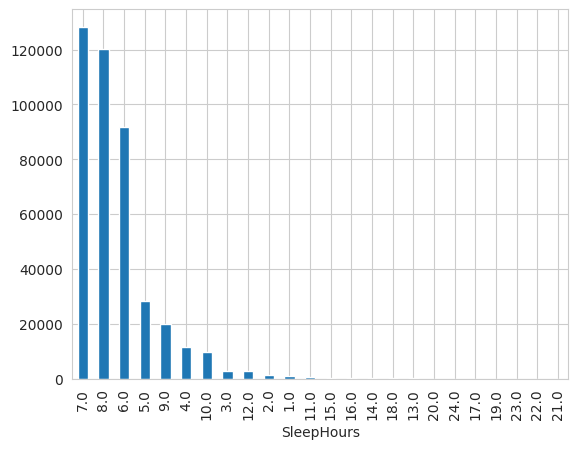

In [200]:
df1['SleepHours'].value_counts().plot(kind='bar')

In [201]:
df1['SleepHours'] = random_impute(df1['SleepHours'])
df1['SleepHours'].isnull().sum()

0

**Checking for mode imputation**

<Axes: xlabel='CovidPos'>

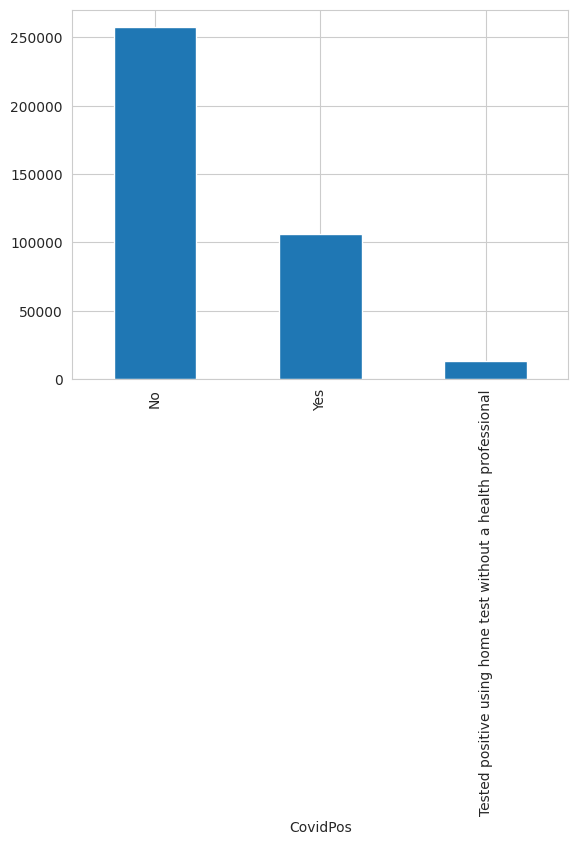

In [202]:
df1['CovidPos'].value_counts().plot(kind='bar')

In [203]:
mode_covid = df1['CovidPos'].mode()[0]
df1['CovidPos'].fillna(value=mode_covid, inplace=True)
df1['CovidPos'].isnull().sum()

0

<Axes: xlabel='SmokerStatus'>

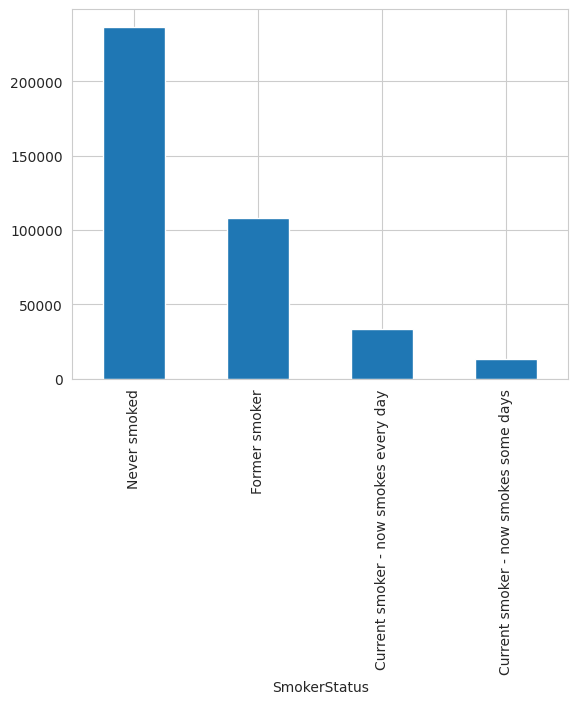

In [204]:
df1['SmokerStatus'].value_counts().plot(kind='bar')

In [205]:
mode_smoker = df1['SmokerStatus'].mode()[0]
df1['SmokerStatus'].fillna(value=mode_smoker, inplace=True)
df1['SmokerStatus'].isnull().sum()

0

<Axes: xlabel='MentalHealthDays'>

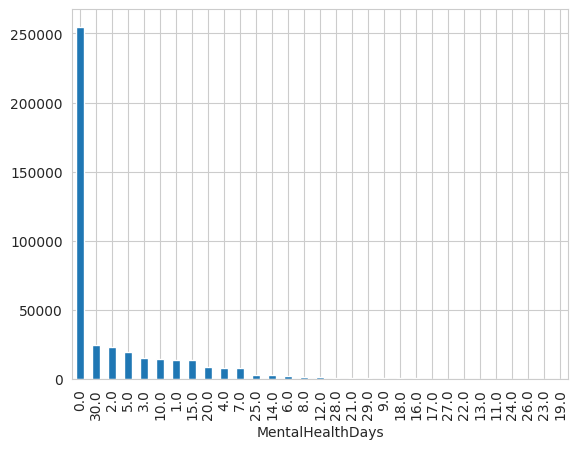

In [206]:
df1['MentalHealthDays'].value_counts().plot(kind='bar')

In [207]:
mode_mental_health = df1['MentalHealthDays'].mode()[0]
df1['MentalHealthDays'].fillna(value=mode_mental_health, inplace=True)
df1['MentalHealthDays'].isnull().sum()

0

<Axes: xlabel='RaceEthnicityCategory'>

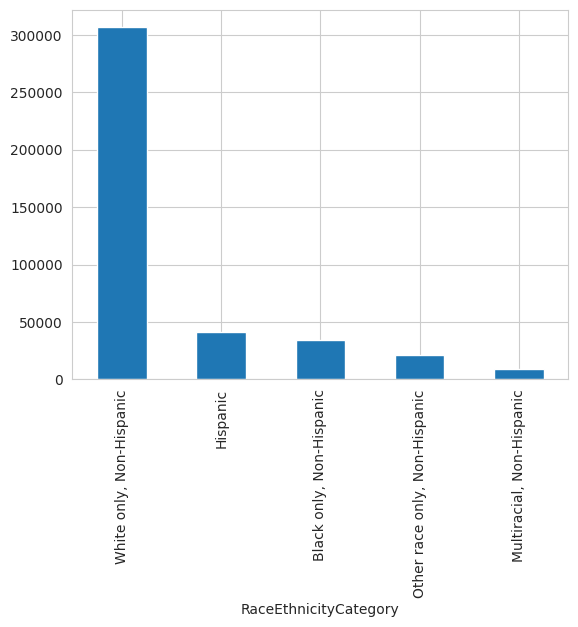

In [208]:
df1['RaceEthnicityCategory'].value_counts().plot(kind='bar')

In [209]:
mode_ethnicity = df1['RaceEthnicityCategory'].mode()[0]
df1['RaceEthnicityCategory'].fillna(value=mode_ethnicity, inplace=True)
df1['RaceEthnicityCategory'].isnull().sum()

0

<Axes: xlabel='HighRiskLastYear'>

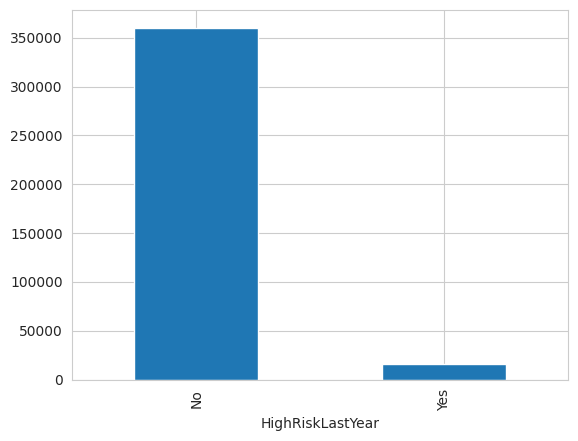

In [210]:
df1['HighRiskLastYear'].value_counts().plot(kind='bar')

In [211]:
mode_high_risk = df1['HighRiskLastYear'].mode()[0]
df1['HighRiskLastYear'].fillna(value=mode_high_risk, inplace=True)
df1['HighRiskLastYear'].isnull().sum()

0

**Imputation for continuous columns**

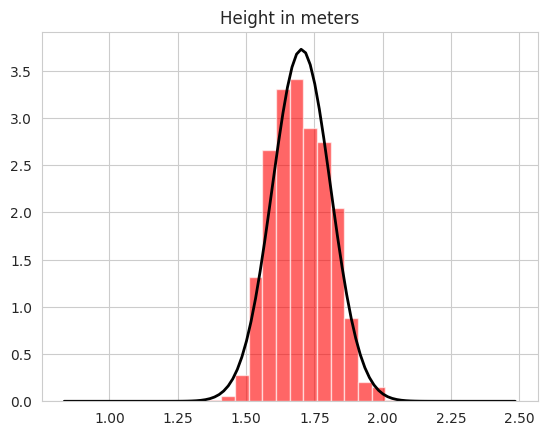

In [212]:
plt.hist(df1['HeightInMeters'].dropna(), bins=30, density=True, alpha=0.6, color='r')

# Fit a normal distribution to the data: Calculate mean and standard deviation
mu, std = norm.fit(df1['HeightInMeters'].dropna())

# Plot the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title('Height in meters')

plt.show()

In [213]:
np.random.seed(42)

# Isolate non-missing values from the column
non_missing_values = df1['HeightInMeters'].dropna()

# Perform random imputation for missing values
df1['HeightInMeters'] = df1['HeightInMeters'].apply(
    lambda x: np.random.choice(non_missing_values) if pd.isnull(x) else x
)

df1['HeightInMeters'].isnull().sum()

0

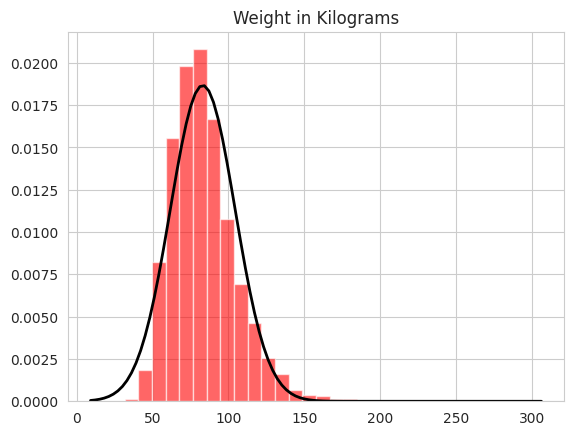

In [214]:
plt.hist(df1['WeightInKilograms'].dropna(), bins=30, density=True, alpha=0.6, color='r')

# Fit a normal distribution to the data: Calculate mean and standard deviation
mu, std = norm.fit(df1['WeightInKilograms'].dropna())

# Plot the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title('Weight in Kilograms')

plt.show()

In [215]:
knn = KNNImputer(n_neighbors=3, weights='distance')

df1['WeightInKilograms'] = knn.fit_transform(df1[['WeightInKilograms']])
df1['WeightInKilograms'].isnull().sum()

0

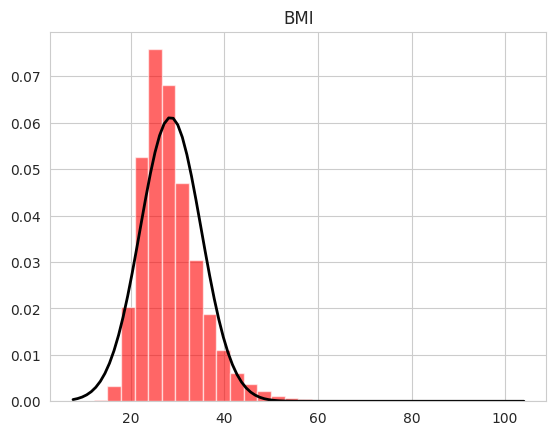

In [216]:
plt.hist(df1['BMI'].dropna(), bins=30, density=True, alpha=0.6, color='r')

# Fit a normal distribution to the data: Calculate mean and standard deviation
mu, std = norm.fit(df1['BMI'].dropna())

# Plot the normal curve
xmin, xmax = plt.xlim()
x = np.linspace(xmin, xmax, 100)
p = norm.pdf(x, mu, std)

plt.plot(x, p, 'k', linewidth=2)
plt.title('BMI')

plt.show()

In [217]:
df1['BMI'] = knn.fit_transform(df1[['BMI']])
df1['BMI'].isnull().sum()

0

**Checking for null values after handling missing values**

In [218]:
df1.isnull().sum()

Sex                         0
GeneralHealth               0
PhysicalHealthDays       9274
MentalHealthDays            0
PhysicalActivities          0
SleepHours                  0
HadHeartAttack              0
HadAngina                   0
HadStroke                   0
HadAsthma                   0
HadSkinCancer               0
HadCOPD                     0
HadDepressiveDisorder       0
HadKidneyDisease            0
HadArthritis                0
HadDiabetes                 0
SmokerStatus                0
RaceEthnicityCategory       0
AgeCategory                 0
HeightInMeters              0
WeightInKilograms           0
BMI                         0
AlcoholDrinkers             0
PneumoVaxEver               0
HighRiskLastYear            0
CovidPos                    0
dtype: int64

**Scatter Plot**

/usr/local/lib/python3.10/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


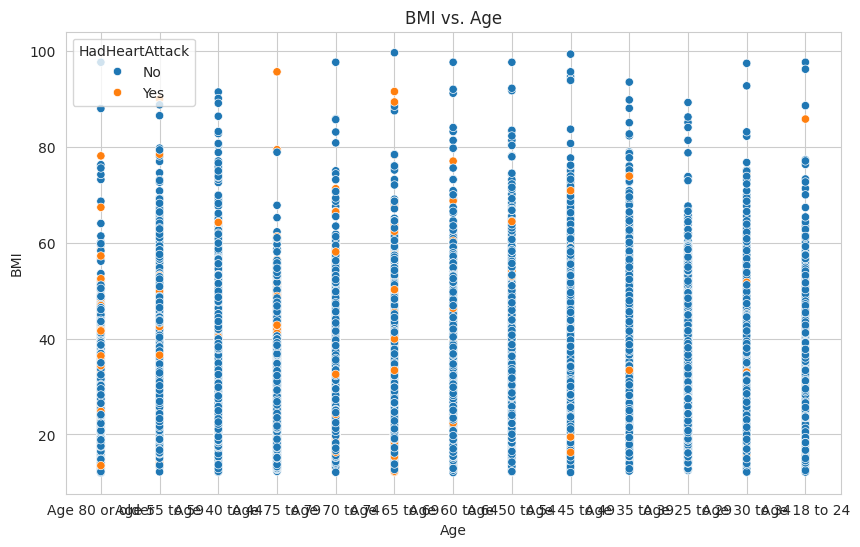

In [219]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='AgeCategory', y='BMI', data=df, hue='HadHeartAttack')
plt.title('BMI vs. Age')
plt.xlabel('Age')
plt.ylabel('BMI')
plt.show()

**Correlation heatmap**

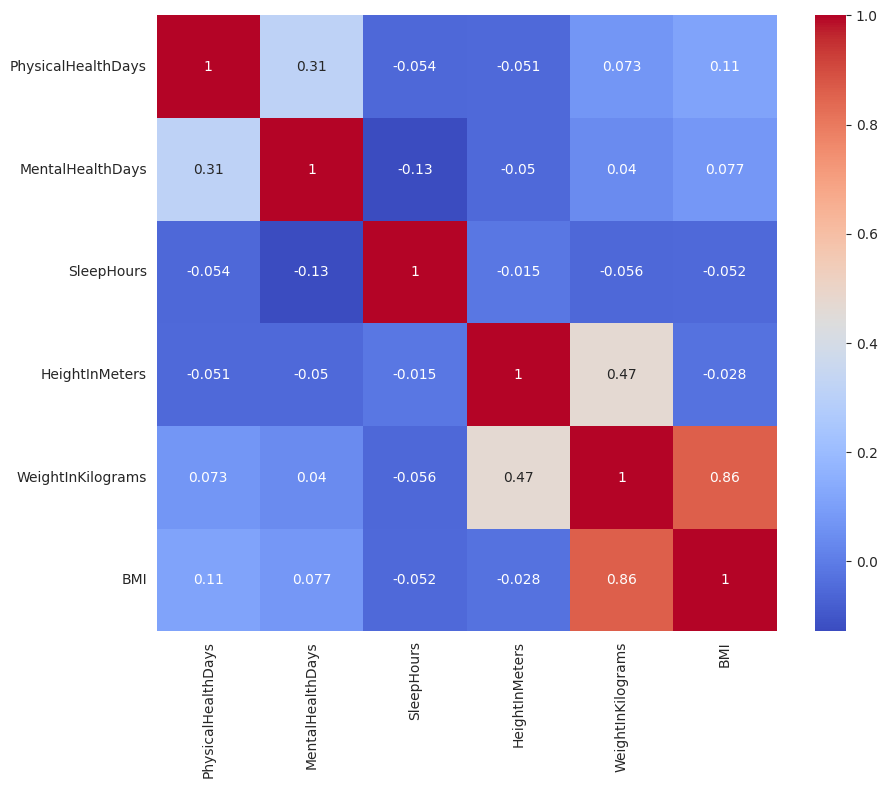

In [220]:
df_selected = df.select_dtypes(include=['number'])
correlation_matrix = df_selected.corr()

plt.figure(figsize=(10,8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [221]:
df1.drop('WeightInKilograms', inplace=True, axis=1)

**Outlier handling**

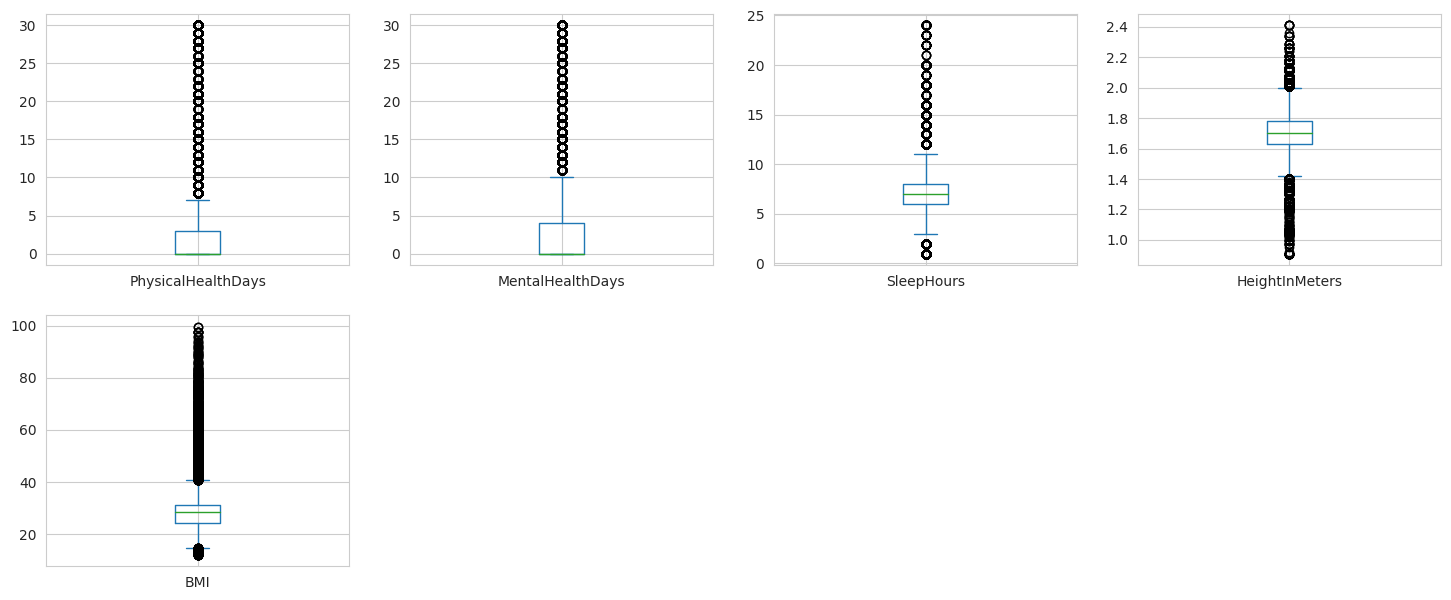

In [222]:
df1.plot(kind='box',subplots=True,figsize=(18,15),layout=(4,4))
plt.show()

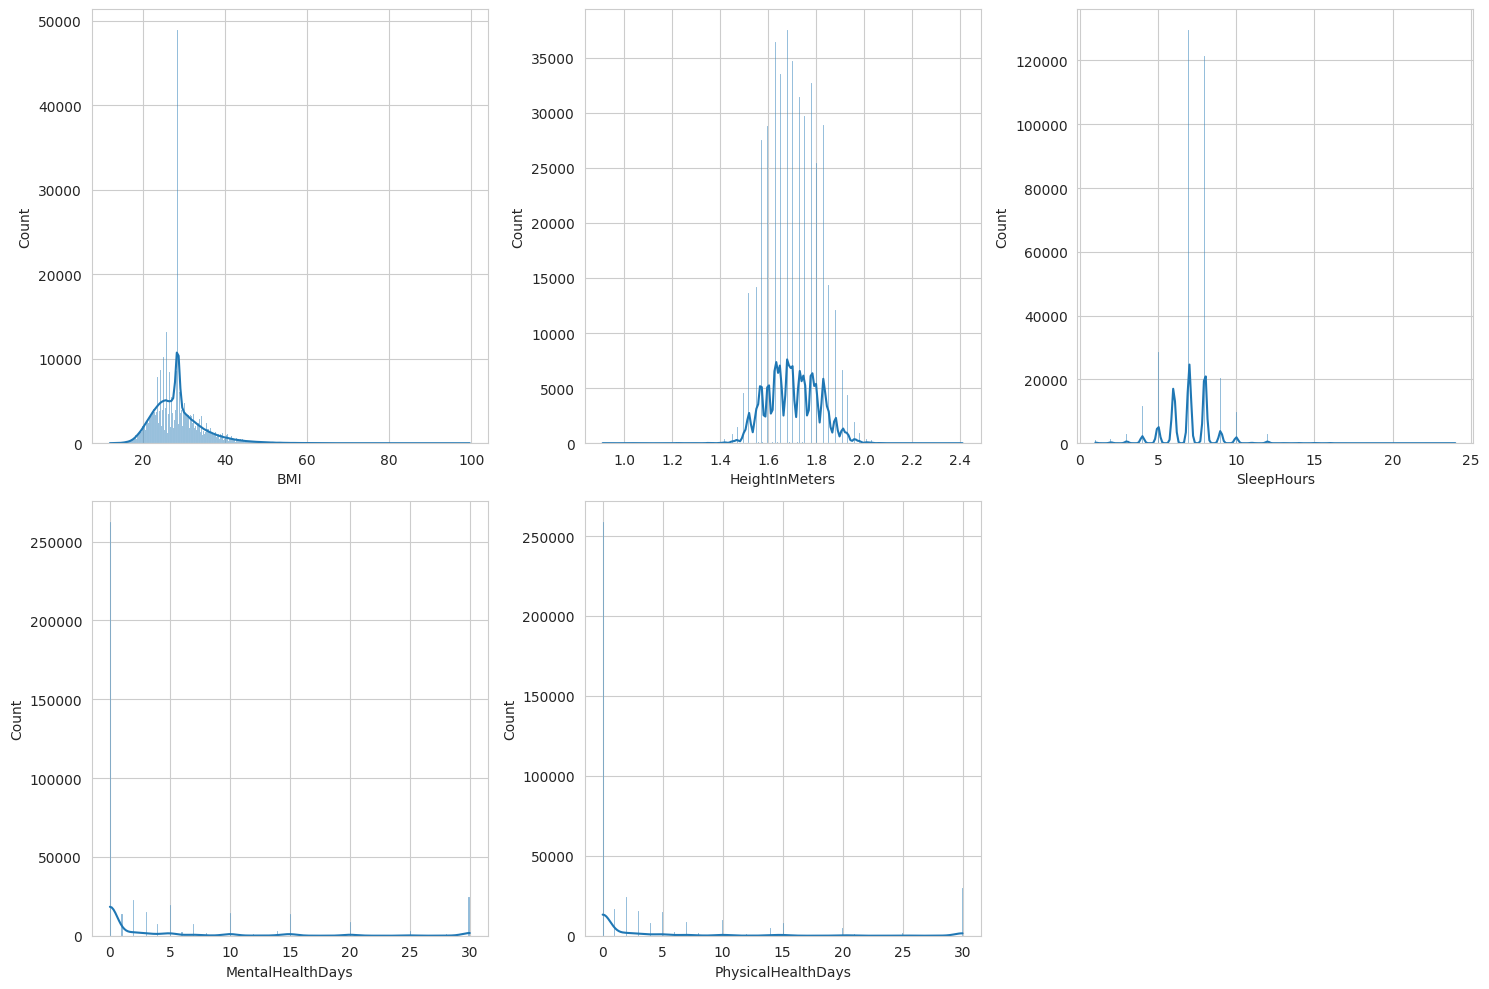

In [223]:
fig, axes = plt.subplots(nrows=2, ncols=3, figsize=(15, 10))

sns.histplot(df1['BMI'], kde=True, ax=axes[0, 0])

sns.histplot(df1['HeightInMeters'], kde=True, ax=axes[0, 1])

sns.histplot(df1['SleepHours'], kde=True, ax=axes[0, 2])

sns.histplot(df1['MentalHealthDays'], kde=True, ax=axes[1, 0])

sns.histplot(df1['PhysicalHealthDays'], kde=True, ax=axes[1, 1])

fig.delaxes(axes[1][2])
plt.tight_layout()
plt.show()

**Checking skew-score values**

In [224]:
skewness = df1.select_dtypes(include=['number']).skew()

for col, value in skewness.items():
    if value > 1 or value < -1:
        print(f"{col} has a highly skewed distribution")
    elif value > 0.5 or value < -0.5:
        print(f"{col} has a moderately skewed distribution")
    else:
        print(f"{col} is approximately symmetric")

PhysicalHealthDays has a highly skewed distribution
MentalHealthDays has a highly skewed distribution
SleepHours has a moderately skewed distribution
HeightInMeters is approximately symmetric
BMI has a highly skewed distribution


**Removing outliers in Height column**

In [225]:
df1['HeightInMeters_zscore'] = (df1['HeightInMeters'] - df1['HeightInMeters'].mean())/df1['HeightInMeters'].std()
filtered_df1 = df1[(df1['HeightInMeters_zscore'] > 3) | (df1['HeightInMeters_zscore'] < -3)]
upper_limit = df1['HeightInMeters'].mean() + 3*df1['HeightInMeters'].std()
lower_limit = df1['HeightInMeters'].mean() - 3*df1['HeightInMeters'].std()
df1['HeightInMeters'] = np.where(
    df1['HeightInMeters'] > upper_limit,
    upper_limit,
    np.where(
        df1['HeightInMeters'] < lower_limit,
        lower_limit,
        df1['HeightInMeters']
    )
)

In [226]:
df1.drop("HeightInMeters_zscore", axis=1, inplace=True)

**Removing outliers in Sleep column**

In [227]:
percentile25_SleepHours = df1['SleepHours'].quantile(0.25)
perceltile75_SleepHours = df1['SleepHours'].quantile(0.75)
iqr = perceltile75_SleepHours - percentile25_SleepHours
upper_limit_SleepHours = perceltile75_SleepHours + 1.5*iqr
lower_limit_SleepHOurs = percentile25_SleepHours - 1.5*iqr
total_count = df1[(df1['SleepHours'] > 11) | (df1['SleepHours'] < 3)]['SleepHours'].value_counts().sum()
df1['SleepHours'] = np.where(
    df1['SleepHours'] > upper_limit_SleepHours,
    upper_limit_SleepHours,
    np.where(
        df1['SleepHours'] < lower_limit_SleepHOurs,
        lower_limit_SleepHOurs,
        df1['SleepHours']
    )
)

In [228]:
percentile25_BMI = df1['BMI'].quantile(0.25)
perceltile75_BMI = df1['BMI'].quantile(0.75)

iqr_BMI = perceltile75_BMI - percentile25_BMI

upper_limit_BMI = perceltile75_BMI + 1.5*iqr_BMI
lower_limit_BMI = percentile25_BMI - 1.5*iqr_BMI

total_count_BMI = df1[(df1['BMI'] > upper_limit_BMI) | (df1['BMI'] < lower_limit_BMI)]['SleepHours'].value_counts().sum()
df1['BMI'] = np.where(
    df1['BMI'] > upper_limit_BMI,
    upper_limit_BMI,
    np.where(
        df1['BMI'] < lower_limit_BMI,
        lower_limit_BMI,
        df1['BMI']
    )
)

In [229]:
percentile25_physical = df1['PhysicalHealthDays'].quantile(0.25)
perceltile75_physical = df1['PhysicalHealthDays'].quantile(0.75)

iqr_physical = perceltile75_physical - percentile25_physical

upper_limit_physical = perceltile75_physical + 1.5*iqr_physical
lower_limit_physical = percentile25_physical - 1.5*iqr_physical
print(upper_limit_physical, lower_limit_physical)

total_count_physical = df1[(df1['PhysicalHealthDays'] > upper_limit_physical)]['PhysicalHealthDays'].value_counts().sum()
df1['PhysicalHealthDays'] = np.where(
    df1['PhysicalHealthDays'] > upper_limit_physical,
    upper_limit_physical,
    df1['PhysicalHealthDays']
)

7.5 -4.5


In [230]:
percentile25_mental = df1['MentalHealthDays'].quantile(0.25)
perceltile75_mental = df1['MentalHealthDays'].quantile(0.75)

iqr_mental = perceltile75_mental - percentile25_mental

upper_limit_mental = perceltile75_mental + 1.5*iqr_mental
lower_limit_mental = percentile25_mental - 1.5*iqr_mental

total_count_mental = df1[(df1['MentalHealthDays'] > upper_limit_mental)]['MentalHealthDays'].value_counts().sum()
df1['MentalHealthDays'] = np.where(
    df1['MentalHealthDays'] > upper_limit_mental,
    upper_limit_mental,
    df1['MentalHealthDays']
)

**Box-plot after handling all the outliers in numerical columns**

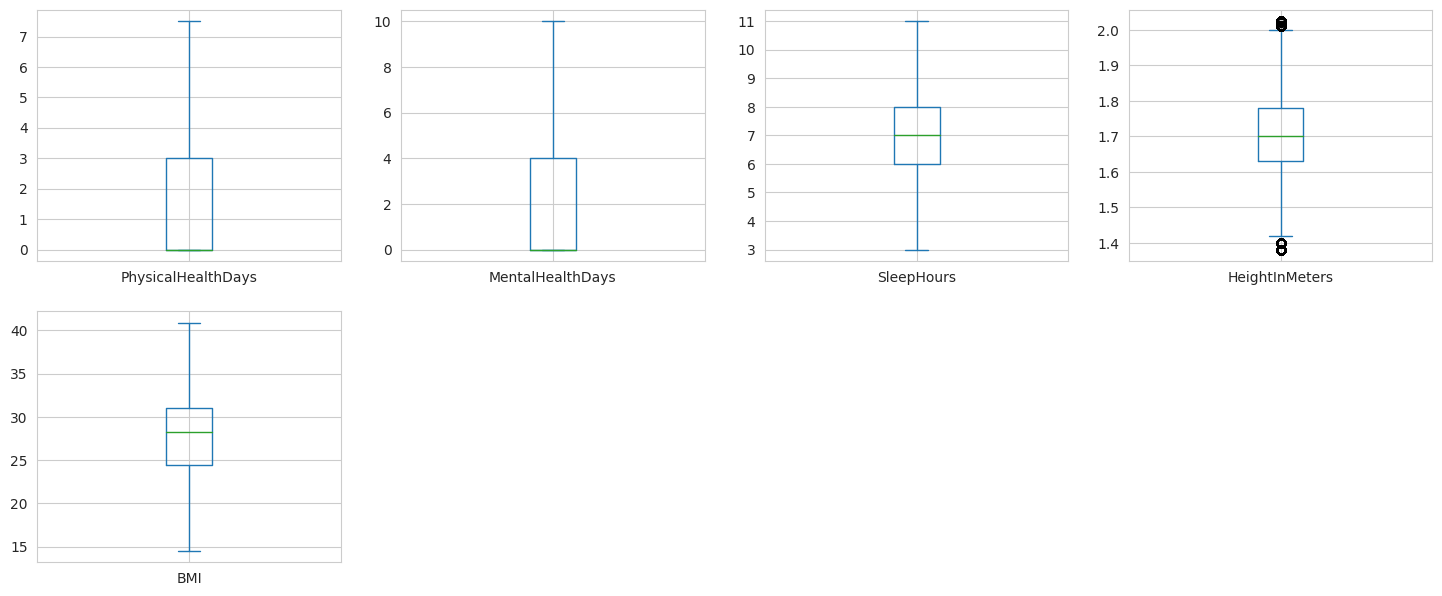

In [231]:
df1.plot(kind='box',subplots=True,figsize=(18,15),layout=(4,4))
plt.show()

**Handling Categorical Values**

In [232]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import OrdinalEncoder

transformer = ColumnTransformer(
    transformers = [
        ('tnf1', OneHotEncoder(sparse=False, drop='first'), ['Sex','PhysicalActivities','HadAngina','HadStroke','HadAsthma','HadSkinCancer',
                                                             'HadCOPD','HadDepressiveDisorder','HadKidneyDisease','HadArthritis','HadDiabetes',
                                                             'SmokerStatus','RaceEthnicityCategory','AlcoholDrinkers','PneumoVaxEver','HighRiskLastYear',
                                                             'CovidPos']),
        ('tnf2', OrdinalEncoder(categories = [['Poor','Fair','Good','Very good','Excellent'],['Age 80 or older', 'Age 55 to 59', 'Age 70 to 74', 'Age 40 to 44',
       'Age 75 to 79', 'Age 65 to 69', 'Age 60 to 64', 'Age 50 to 54',
       'Age 45 to 49', 'Age 35 to 39', 'Age 25 to 29', 'Age 30 to 34',
       'Age 18 to 24']]), ['GeneralHealth', 'AgeCategory'])
    ],
    remainder = 'passthrough'
)

In [233]:
df2 = transformer.fit_transform(df1)

/usr/local/lib/python3.10/dist-packages/sklearn/preprocessing/_encoders.py:868: FutureWarning: `sparse` was renamed to `sparse_output` in version 1.2 and will be removed in 1.4. `sparse_output` is ignored unless you leave `sparse` to its default value.
  warnings.warn(


In [234]:
def get_feature_names(columnTransformer):
    # Extract the original column names
    original_column_names = columnTransformer.feature_names_in_

    # Initialize an empty list for the final feature names
    feature_names = []

    # Loop through each transformer in the column transformer
    for transformer_info in columnTransformer.transformers_:
        transformer_name, transformer, cols = transformer_info

        # If it's not the remainder transformer
        if transformer_name != 'remainder':
            if hasattr(transformer, 'get_feature_names_out'):
                # For transformers with get_feature_names_out method
                feature_names.extend(transformer.get_feature_names_out(cols))
            else:
                # For transformers without get_feature_names_out method
                feature_names.extend(cols)
        else:
            # Handling the remainder case
            if transformer == 'passthrough':
                feature_names.extend(original_column_names[cols])
            elif transformer is None:
                pass  # If there's a transformer set to None (which means dropping the column)

    return feature_names

# Assuming the transformer has already been fit
updated_column_names = get_feature_names(transformer)

In [235]:
df2 = pd.DataFrame(df2, columns=updated_column_names)
df2.head()

,Sex_Male,PhysicalActivities_Yes,HadAngina_Yes,HadStroke_Yes,HadAsthma_Yes,HadSkinCancer_Yes,HadCOPD_Yes,HadDepressiveDisorder_Yes,HadKidneyDisease_Yes,HadArthritis_Yes,...,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,GeneralHealth,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HeightInMeters,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,0.0,0.0,8.0,No,1.83,28.514877
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,0.0,0.0,6.0,No,1.6,26.57
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,2.0,3.0,5.0,No,1.57,25.61
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.0,4.0,0.0,0.0,7.0,No,1.65,23.3
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,2.0,0.0,9.0,No,1.57,21.77


In [236]:
df2.isnull().sum()

Sex_Male                                                                     0
PhysicalActivities_Yes                                                       0
HadAngina_Yes                                                                0
HadStroke_Yes                                                                0
HadAsthma_Yes                                                                0
HadSkinCancer_Yes                                                            0
HadCOPD_Yes                                                                  0
HadDepressiveDisorder_Yes                                                    0
HadKidneyDisease_Yes                                                         0
HadArthritis_Yes                                                             0
HadDiabetes_No, pre-diabetes or borderline diabetes                          0
HadDiabetes_Yes                                                              0
HadDiabetes_Yes, but only during pregnancy (female) 

In [237]:
df2 = df2.dropna(subset=['PhysicalHealthDays', 'BMI'])

In [238]:
df2.shape

(415312, 33)

In [239]:
scaler = StandardScaler()

columns_to_scale = ['PhysicalHealthDays','MentalHealthDays','SleepHours','HeightInMeters','BMI']
df3 = df2.copy()
df3[columns_to_scale] = scaler.fit_transform(df3[columns_to_scale])

In [240]:
df3.head()

,Sex_Male,PhysicalActivities_Yes,HadAngina_Yes,HadStroke_Yes,HadAsthma_Yes,HadSkinCancer_Yes,HadCOPD_Yes,HadDepressiveDisorder_Yes,HadKidneyDisease_Yes,HadArthritis_Yes,...,CovidPos_Tested positive using home test without a health professional,CovidPos_Yes,GeneralHealth,AgeCategory,PhysicalHealthDays,MentalHealthDays,SleepHours,HadHeartAttack,HeightInMeters,BMI
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,3.0,0.0,-0.656621,-0.643633,0.738527,No,1.193196,0.043927
1,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,0.0,4.0,0.0,-0.656621,-0.643633,-0.754082,No,-0.975090,-0.316704
2,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,0.0,1.0,3.0,1.0,0.032713,0.146015,-1.500386,No,-1.257910,-0.494713
3,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,4.0,4.0,-0.656621,-0.643633,-0.007777,No,-0.503724,-0.923048
4,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,3.0,0.032713,-0.643633,1.484831,No,-1.257910,-1.206751


In [241]:
numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns

**Feature Engineering**

In [242]:
le = LabelEncoder()

df3['HadHeartAttack'] = le.fit_transform(df3['HadHeartAttack'])
df3['HadHeartAttack']

0         0
1         0
2         0
3         0
4         0
         ..
424581    0
424582    0
424583    0
424584    1
424585    0
Name: HadHeartAttack, Length: 415312, dtype: int64

In [243]:
scaler = MinMaxScaler(feature_range=(0, 1))

df4 = df2.copy()
columns_to_scale = ['PhysicalHealthDays', 'MentalHealthDays', 'SleepHours', 'HeightInMeters', 'BMI']
df4[columns_to_scale] = scaler.fit_transform(df4[columns_to_scale])

In [244]:
X_required = df4.drop('HadHeartAttack', axis=1)
y_required = df4['HadHeartAttack']

**Using chi-square to get significant features**

In [245]:
chi_scores, p_values = chi2(X_required, y_required)

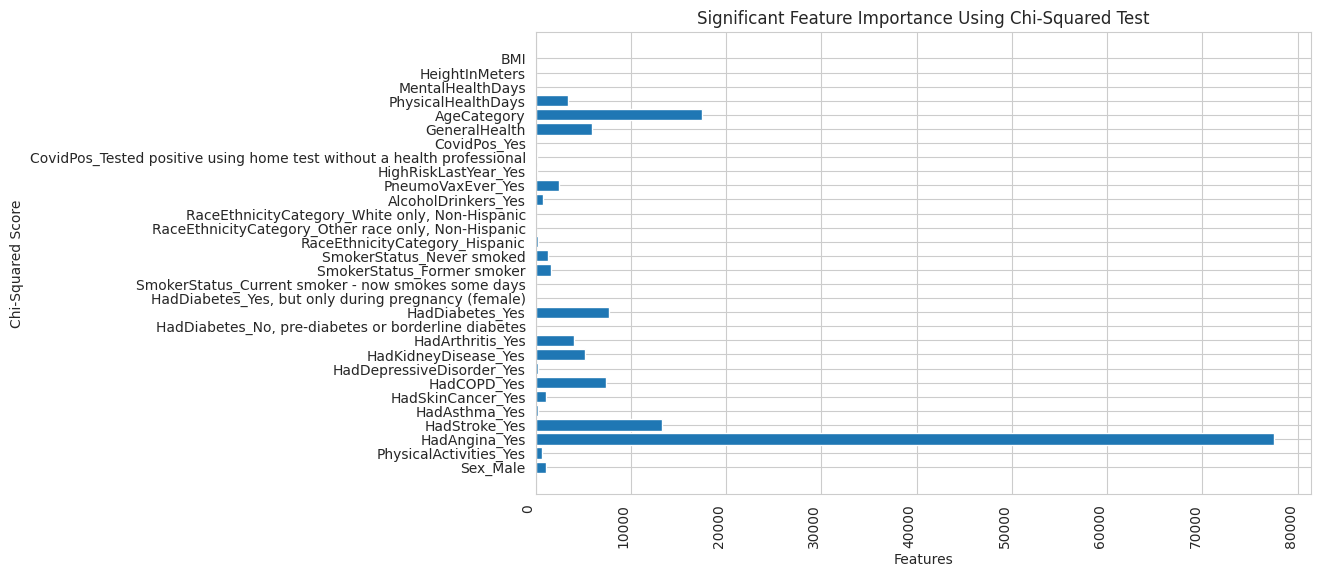

In [246]:
significant_features_chi = np.array(X_required.columns)[p_values < 0.05]

X_significant = X_required[significant_features_chi]

# Filter chi_scores and p_values for significant features
significant_chi_scores = chi_scores[p_values < 0.05]
significant_p_values = p_values[p_values < 0.05]

# Visualization
plt.figure(figsize=(10, 6))
plt.barh(significant_features_chi, significant_chi_scores, tick_label=significant_features_chi)
plt.xlabel('Features')
plt.ylabel('Chi-Squared Score')
plt.title('Significant Feature Importance Using Chi-Squared Test')
plt.xticks(rotation=90, ha="right")
plt.show()

In [247]:
len(significant_features_chi)

30

**Data imbalance**

Text(0.5, 1.0, 'Class Distribution')

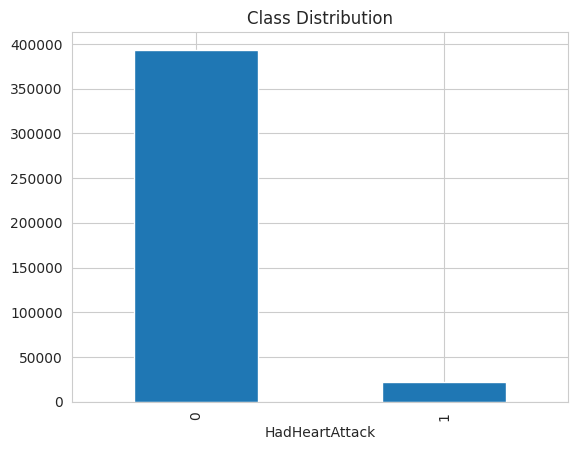

In [248]:
df3['HadHeartAttack'].value_counts().plot(kind='bar')
plt.title('Class Distribution')

Text(0.5, 1.0, 'Using SMOTE to handle Class Imblance')

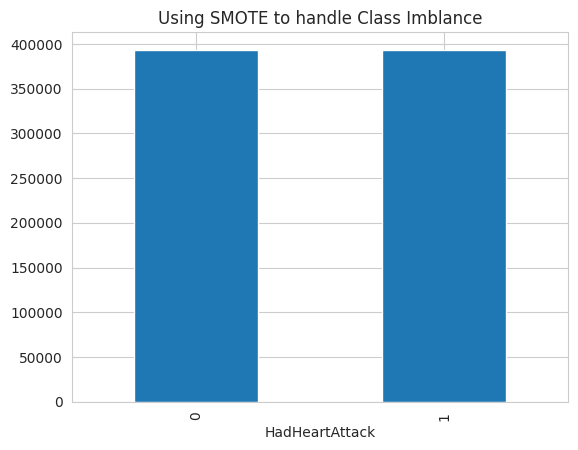

In [249]:
X = df3.drop('HadHeartAttack', axis=1)
y = df3['HadHeartAttack']

smote = SMOTE(sampling_strategy='minority')
X_sm, y_sm = smote.fit_resample(X, y)

y_sm.value_counts().plot(kind='bar')
plt.title('Using SMOTE to handle Class Imblance')

**Dataset based on feature selection method**

In [250]:
X_chi = X_sm[significant_features_chi]
y = y_sm

**Chi square method**

In [251]:
X_train_chi, X_test_chi, y_train_chi, y_test_chi = train_test_split(X_chi, y, test_size=0.2, random_state=42)

In [252]:
X_train_chi = X_train_chi.apply(pd.to_numeric)
X_test_chi = X_test_chi.apply(pd.to_numeric)

**Logistic Regression**

In [253]:
lr = LogisticRegression(C=1)
lr.fit(X_train_chi, y_train_chi)
lr.score(X_test_chi, y_test_chi)
y_pred_lr = lr.predict(X_test_chi)
report = classification_report(y_test_chi, y_pred_lr)
confusion_lr = confusion_matrix(y_test_chi, y_pred_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


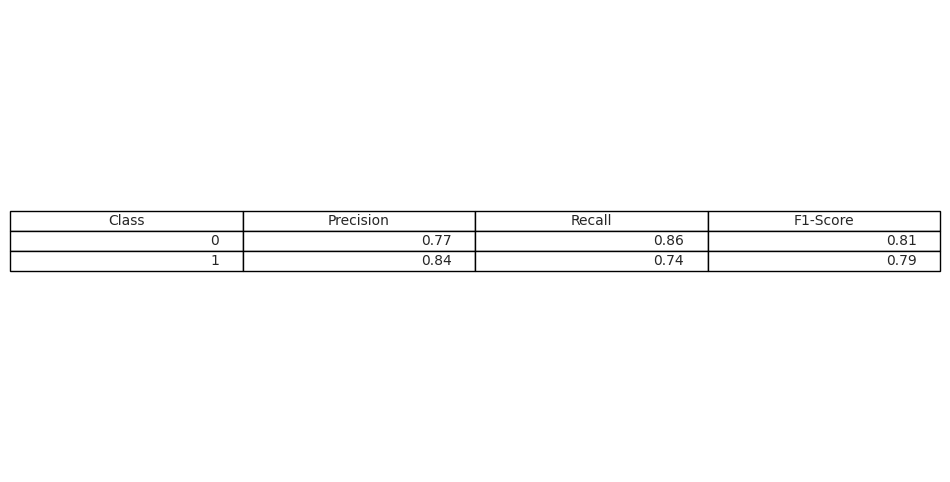

In [254]:
report = classification_report(y_test_chi, y_pred_lr)
report_lines = report.split('\n')

# Initialize an empty list to store data for the DataFrame
data = []

# Iterate over each line in the report (excluding the first and last lines)
for line in report_lines[2:-5]:
    # Split the line by spaces
    line_data = line.split()
    # Extract relevant values (class name, precision, recall, f1-score, support)
    class_name = line_data[0]
    precision = float(line_data[1])
    recall = float(line_data[2])
    f1_score = float(line_data[3])
    # Append the extracted data to the list
    data.append([class_name, precision, recall, f1_score])

# Create a DataFrame from the list of data
df_report = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score'])
# Create a figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Hide the axes
ax.axis('off')

# Plot the table
table = ax.table(cellText=df_report.values,
                 colLabels=df_report.columns,
                 loc='center')

# Add lines between rows and columns
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save the table as a PNG file
plt.savefig('classification_report.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

**Accuracy of Logistic Regression**

In [268]:

lr = LogisticRegression(C=1)
lr.fit(X_train_chi, y_train_chi)
y_pred_lr = lr.predict(X_test_chi)
accuracy_lr = accuracy_score(y_test_chi, y_pred_lr)
report_lr = classification_report(y_test_chi, y_pred_lr)
print(f"Logistic Regression Accuracy: {accuracy_lr:.4f}")
print(report_lr)

/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Logistic Regression Accuracy: 0.7988
              precision    recall  f1-score   support

           0       0.77      0.86      0.81     78635
           1       0.84      0.74      0.79     78736

    accuracy                           0.80    157371
   macro avg       0.80      0.80      0.80    157371
weighted avg       0.80      0.80      0.80    157371



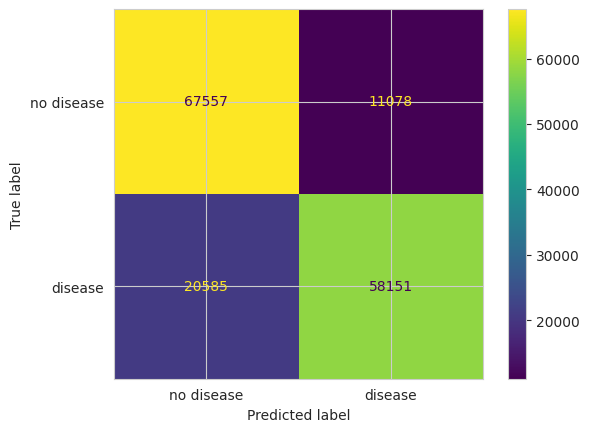

In [255]:
cm_dis= ConfusionMatrixDisplay(confusion_lr, display_labels = ['no disease', 'disease'])
cm_dis.plot()

**ROC curve of Logistic Regression**


ROC AUC: 0.8824


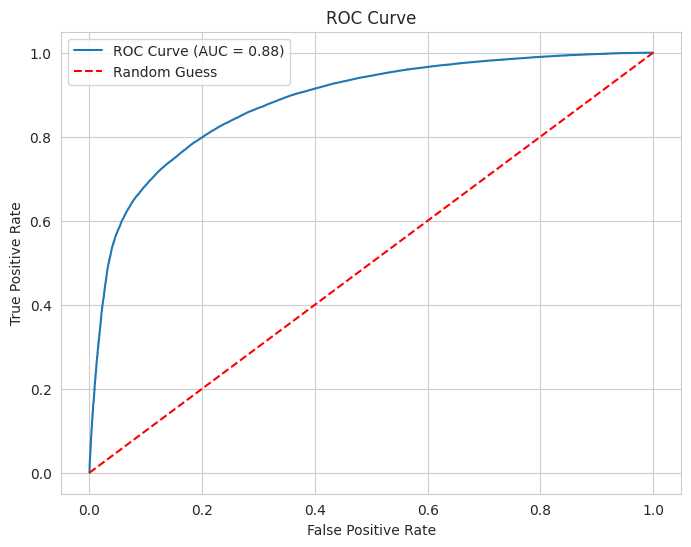

In [256]:
y_probs = lr.predict_proba(X_test_chi)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_chi, y_probs)
roc_auc = auc(fpr, tpr)
print(f"\nROC AUC: {roc_auc:.4f}")

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

**Decision Tree**

**Accuracy of Decision Tree**

In [257]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
clf = DecisionTreeClassifier(random_state=42)

# Fit the classifier to the training data
clf.fit(X_train_chi, y_train_chi)

# Make predictions on the test data
y_pred_dt = clf.predict(X_test_chi)
from sklearn.metrics import classification_report

report = classification_report(y_test_chi, y_pred_dt)

print(report)

              precision    recall  f1-score   support

           0       0.96      0.95      0.95     78635
           1       0.95      0.96      0.95     78736

    accuracy                           0.95    157371
   macro avg       0.95      0.95      0.95    157371
weighted avg       0.95      0.95      0.95    157371



**ROC curve of Decision Tree**

Confusion Matrix:
[[74626  4009]
 [ 3371 75365]]

Classification Report:
              precision    recall  f1-score   support

           0       0.96      0.95      0.95     78635
           1       0.95      0.96      0.95     78736

    accuracy                           0.95    157371
   macro avg       0.95      0.95      0.95    157371
weighted avg       0.95      0.95      0.95    157371


ROC AUC: 0.9532


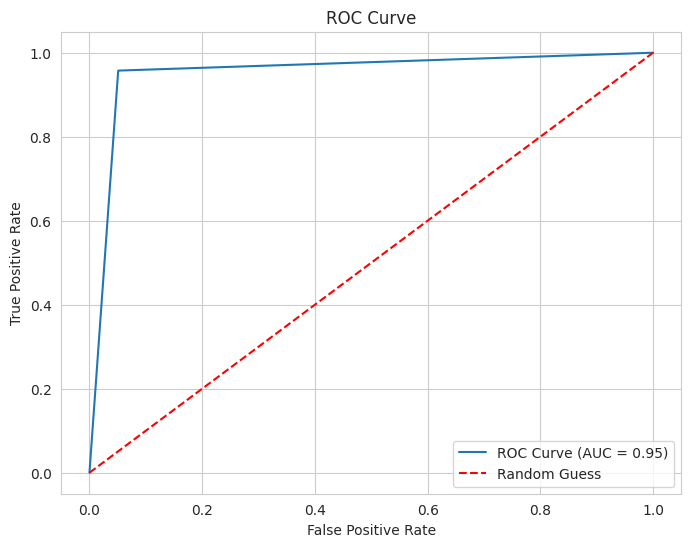

In [258]:
from sklearn.metrics import confusion_matrix, classification_report, roc_auc_score, roc_curve, auc

# Calculate confusion matrix
conf_matrix = confusion_matrix(y_test_chi, y_pred_dt)
print("Confusion Matrix:")
print(conf_matrix)

# Print classification report
class_report = classification_report(y_test_chi, y_pred_dt)
print("\nClassification Report:")
print(class_report)

# Calculate ROC curve and AUC
y_probs = clf.predict_proba(X_test_chi)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_chi, y_probs)
roc_auc = auc(fpr, tpr)
print(f"\nROC AUC: {roc_auc:.4f}")

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

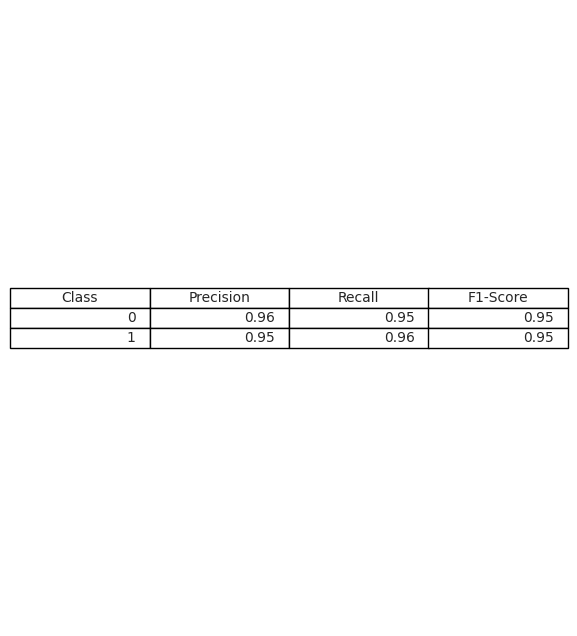

In [259]:
report = classification_report(y_test_chi, y_pred_dt)
report_lines = report.split('\n')

# Initialize an empty list to store data for the DataFrame
data = []

# Iterate over each line in the report (excluding the first and last lines)
for line in report_lines[2:-5]:
    # Split the line by spaces
    line_data = line.split()
    # Extract relevant values (class name, precision, recall, f1-score, support)
    class_name = line_data[0]
    precision = float(line_data[1])
    recall = float(line_data[2])
    f1_score = float(line_data[3])
    # Append the extracted data to the list
    data.append([class_name, precision, recall, f1_score])

# Create a DataFrame from the list of data
df_report = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score'])
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 8))

# Hide the axes
ax.axis('off')

# Plot the table
table = ax.table(cellText=df_report.values,
                 colLabels=df_report.columns,
                 loc='center')

# Add lines between rows and columns
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save the table as a PNG file
plt.savefig('classification_report.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

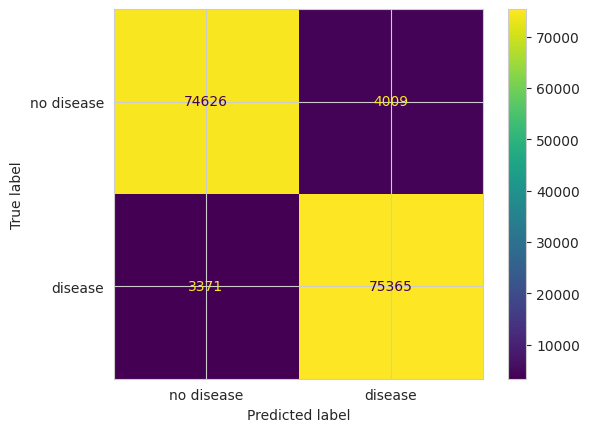

In [260]:
cm_dis= ConfusionMatrixDisplay(conf_matrix, display_labels = ['no disease', 'disease'])
cm_dis.plot()

**Random Forest**

**Accuracy of Random Forest**

In [261]:
from sklearn.ensemble import RandomForestClassifier
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)

# Fit the classifier to the training data
rf_clf.fit(X_train_chi, y_train_chi)

# Make predictions on the test data
y_pred_chi = rf_clf.predict(X_test_chi)

# Evaluate the accuracy of the classifier
accuracy = accuracy_score(y_test_chi, y_pred_chi)
print(f"Accuracy: {accuracy:.4f}")

# Print classification report and confusion matrix
print("\nClassification Report:")
print(classification_report(y_test_chi, y_pred_chi))

print("\nConfusion Matrix:")
print(confusion_matrix(y_test_chi, y_pred_chi))

Accuracy: 0.9745

Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.98      0.97     78635
           1       0.98      0.97      0.97     78736

    accuracy                           0.97    157371
   macro avg       0.97      0.97      0.97    157371
weighted avg       0.97      0.97      0.97    157371


Confusion Matrix:
[[77264  1371]
 [ 2636 76100]]


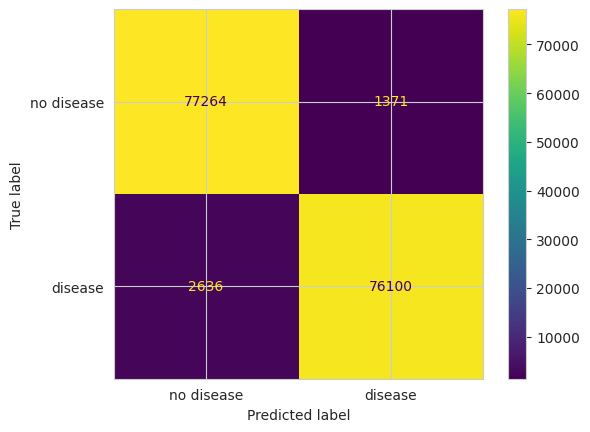

In [262]:
y_pred = rf_clf.predict(X_test_chi)
confusion_rf=confusion_matrix(y_test_chi, y_pred_chi)
cm_dis= ConfusionMatrixDisplay(confusion_rf, display_labels = ['no disease', 'disease'])
cm_dis.plot()

**ROC curve of Random Forest**


ROC AUC: 0.9958


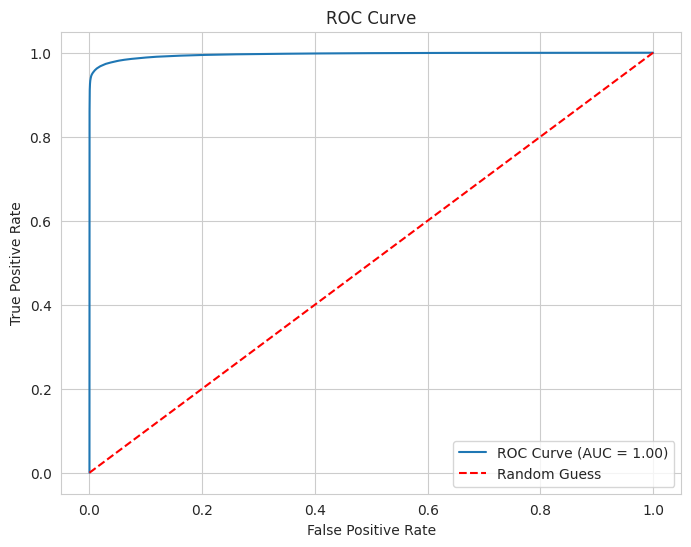

In [263]:
y_probs = rf_clf.predict_proba(X_test_chi)[:, 1]  # Probabilities for positive class
fpr, tpr, thresholds = roc_curve(y_test_chi, y_probs)
roc_auc = auc(fpr, tpr)
print(f"\nROC AUC: {roc_auc:.4f}")

# Plot ROC curve
import matplotlib.pyplot as plt
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], 'r--', label='Random Guess')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.legend()
plt.show()

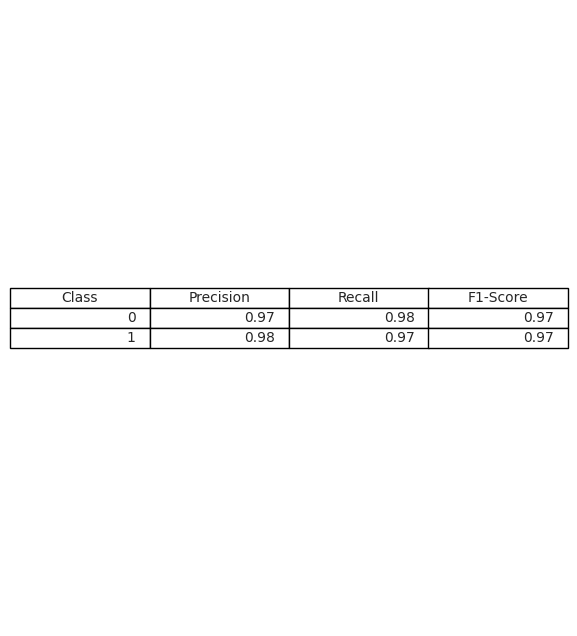

In [264]:
report = classification_report(y_test_chi, y_pred)
report_lines = report.split('\n')

# Initialize an empty list to store data for the DataFrame
data = []

# Iterate over each line in the report (excluding the first and last lines)
for line in report_lines[2:-5]:
    # Split the line by spaces
    line_data = line.split()
    # Extract relevant values (class name, precision, recall, f1-score, support)
    class_name = line_data[0]
    precision = float(line_data[1])
    recall = float(line_data[2])
    f1_score = float(line_data[3])
    # Append the extracted data to the list
    data.append([class_name, precision, recall, f1_score])

# Create a DataFrame from the list of data
df_report = pd.DataFrame(data, columns=['Class', 'Precision', 'Recall', 'F1-Score'])
# Create a figure and axis
fig, ax = plt.subplots(figsize=(6, 8))

# Hide the axes
ax.axis('off')

# Plot the table
table = ax.table(cellText=df_report.values,
                 colLabels=df_report.columns,
                 loc='center')

# Add lines between rows and columns
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)

# Save the table as a PNG file
plt.savefig('classification_report.png', bbox_inches='tight', pad_inches=0.05)
plt.show()

**Comparison between Model**

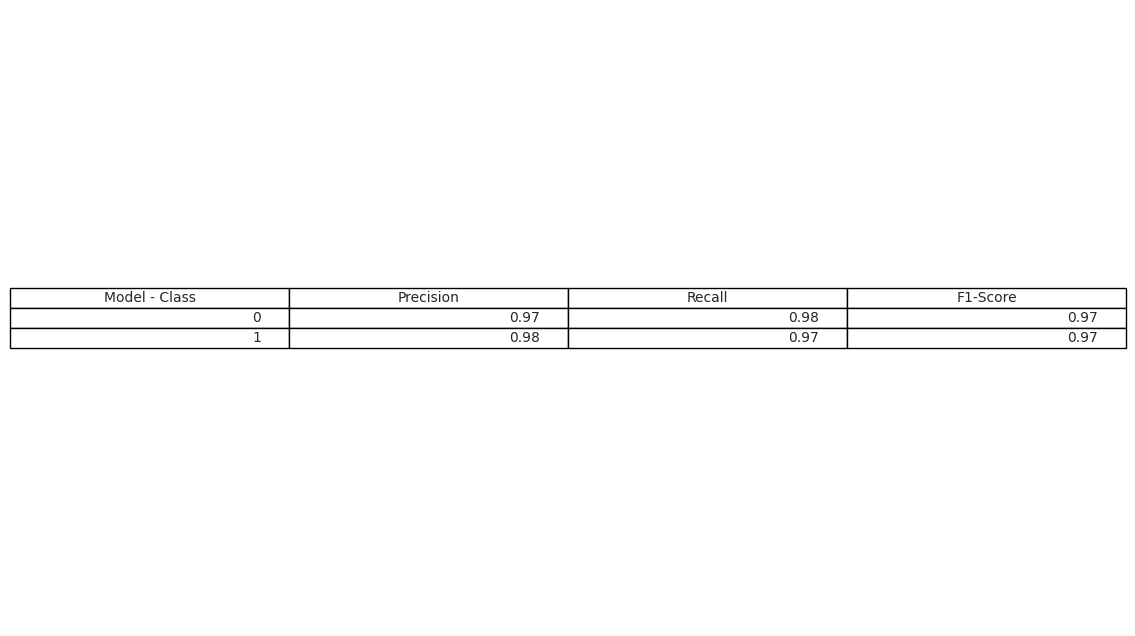

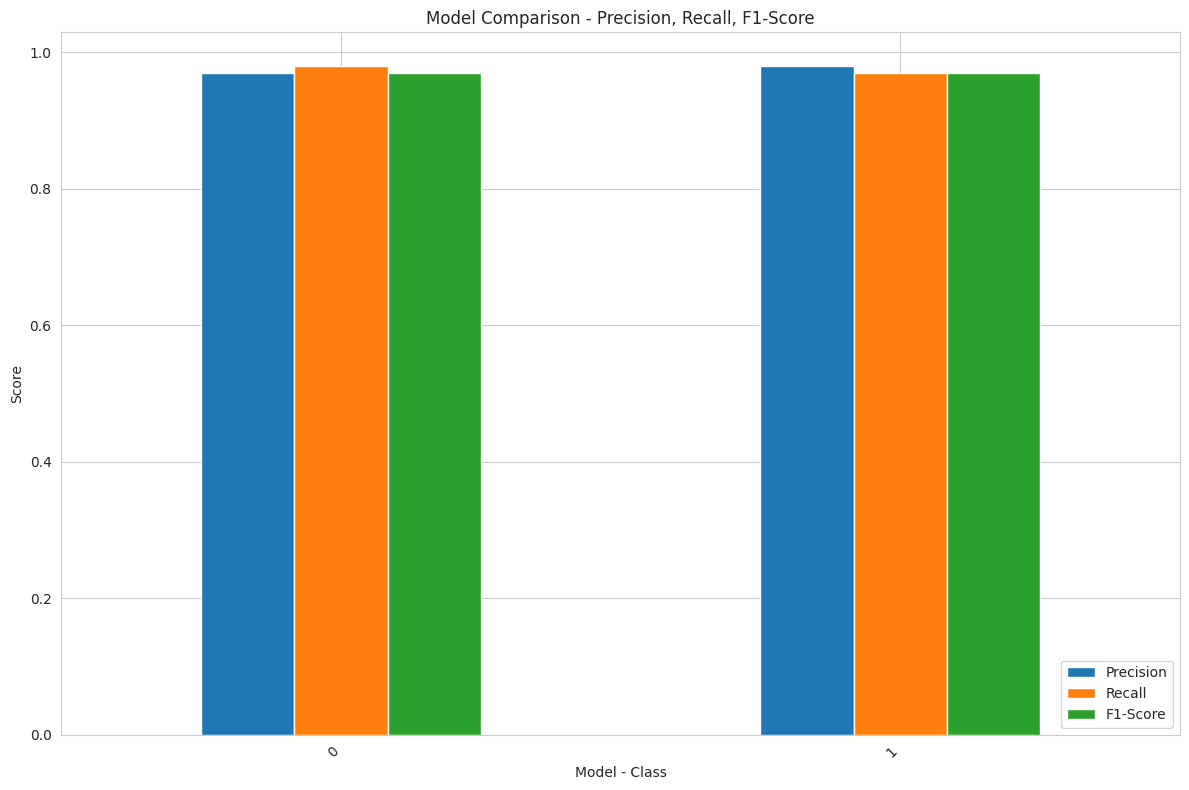

In [265]:
# Create a DataFrame from the list of data
df_report = pd.DataFrame(data, columns=['Model - Class', 'Precision', 'Recall', 'F1-Score'])

# Plotting the comparison table
fig, ax = plt.subplots(figsize=(12, 8))
ax.axis('off')
table = ax.table(cellText=df_report.values, colLabels=df_report.columns, loc='center')
table.auto_set_font_size(False)
table.set_fontsize(10)
table.scale(1.2, 1.2)
plt.show()

# Plotting the Precision, Recall, and F1-Score for each model and class
df_report.set_index('Model - Class').plot(kind='bar', figsize=(12, 8))
plt.title('Model Comparison - Precision, Recall, F1-Score')
plt.xlabel('Model - Class')
plt.ylabel('Score')
plt.legend(loc='lower right')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()

<ipython-input-266-6df495e37118>:14: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='viridis')


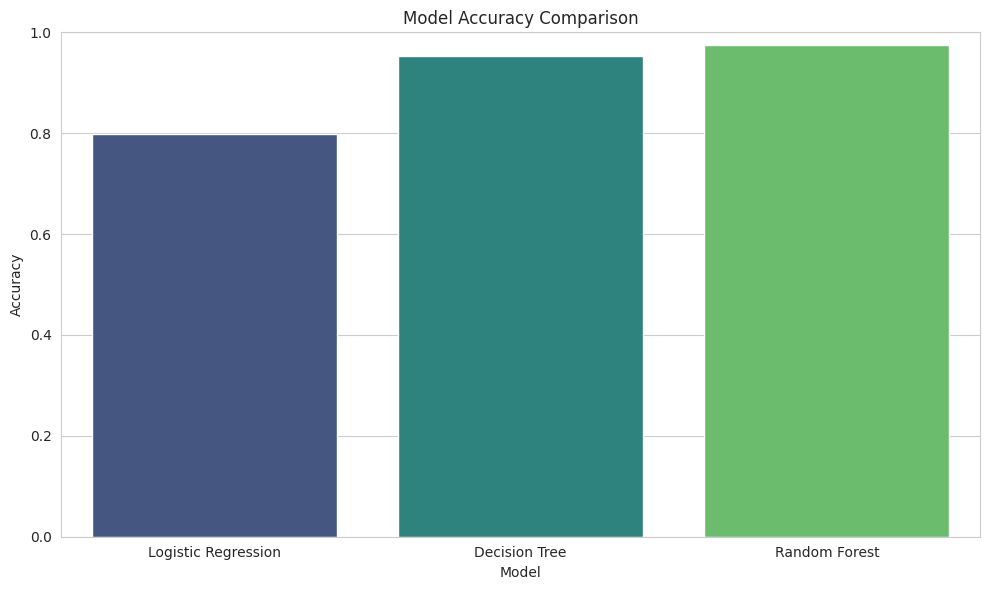

In [266]:
# Calculate accuracy for each model
accuracy_lr = accuracy_score(y_test_chi, y_pred_lr)
accuracy_dt = accuracy_score(y_test_chi, y_pred_dt)
accuracy_rf = accuracy_score(y_test_chi, y_pred_chi)

# Create a DataFrame with the accuracy scores
df_accuracy = pd.DataFrame({
    'Model': ['Logistic Regression', 'Decision Tree', 'Random Forest'],
    'Accuracy': [accuracy_lr, accuracy_dt, accuracy_rf]
})

# Plotting the bar plot
plt.figure(figsize=(10, 6))
sns.barplot(x='Model', y='Accuracy', data=df_accuracy, palette='viridis')
plt.title('Model Accuracy Comparison')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Assuming accuracy is between 0 and 1
plt.tight_layout()
plt.show()